Branching GP Regression on synthetic data
--

*Alexis Boukouvalas, 2017*

Branching GP regression with Gaussian noise on the hematopoiesis data described in the paper "BGP: Gaussian processes for identifying branching dynamics in single cell data".

This notebook shows how to build a BGP model and plot the posterior model fit and posterior branching times.

In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from BranchedGP import VBHelperFunctions as bplot
plt.style.use('ggplot')
%matplotlib inline

### Load the data
1. Monocle has already been run on the data. The first columns contains the state assigned by the DDRTree algorithm to each cell.
1. Second column is the gene time.
1. All other columns are the 40 genes. The first 10 branch early, then 20 branch late and 10 do not branch.

In [2]:
datafile='syntheticdata/synthetic20.csv'
data = pd.read_csv(datafile, index_col=[0])
G = data.shape[1] - 2  # all data - time columns - state column
Y = data.iloc[:, 2:]
trueBranchingTimes = np.array([float(Y.columns[i][-3:]) for i in range(G)])

In [3]:
data.head()

,MonocleState,Time,Y0_0.1,Y1_0.1,Y2_0.1,Y3_0.1,Y4_0.1,Y5_0.1,Y6_0.1,Y7_0.1,...,Y30_1.1,Y31_1.1,Y32_1.1,Y33_1.1,Y34_1.1,Y35_1.1,Y36_1.1,Y37_1.1,Y38_1.1,Y39_1.1
0,3.0,0.969910,0.875437,-0.748863,-1.016271,-2.678964,0.821025,1.604661,-1.907981,-0.095716,...,-0.359742,1.970076,-1.807038,1.342145,-0.095995,2.464551,-0.620385,2.007109,0.041135,-0.757357
1,1.0,0.122038,-0.907147,-1.580759,-0.400795,-2.179394,-0.516783,0.213534,-0.430098,-0.451737,...,-0.878141,0.028067,-0.015040,-1.735634,0.030597,0.208739,-0.595135,0.955642,-0.271234,-1.326305
2,2.0,0.271349,-1.226234,-1.084321,0.117731,-1.887095,-0.993914,-0.020810,-0.175115,-0.755351,...,-0.808743,0.639339,0.193315,-1.258822,0.003173,0.393885,-0.809217,1.206395,-0.225219,-1.317605
3,3.0,0.520068,0.430385,-1.693506,-1.441682,-2.874642,0.392821,1.014923,-1.874323,0.200560,...,-0.493171,1.387135,-0.357995,-0.524626,-0.024159,1.464900,-0.974829,1.107700,0.169320,-1.082405
4,1.0,0.212339,-1.076617,-1.211521,0.030578,-1.960545,-0.820111,0.004572,-0.174163,-0.675381,...,-0.903597,0.393455,0.146080,-1.535963,-0.042453,0.294899,-0.604018,1.031153,-0.297941,-1.359075


# Plot the data

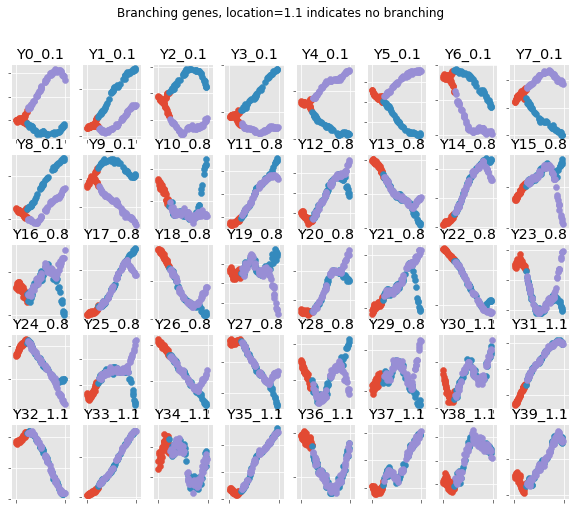

In [4]:
f, ax = plt.subplots(5, 8, figsize=(10, 8))
ax = ax.flatten()
for i in range(G):
    for s in np.unique(data['MonocleState']):
        idxs = (s == data['MonocleState'].values)
        ax[i].scatter(data['Time'].loc[idxs], Y.iloc[:, i].loc[idxs])
        ax[i].set_title(Y.columns[i])
        ax[i].set_yticklabels([])
        ax[i].set_xticklabels([])
f.suptitle('Branching genes, location=1.1 indicates no branching')

# Run the BGP model
Run script `runsyntheticData.py` to obtain a pickle file with results. 
This script can take ~10 to 20 minutes depending on your hardware.
It performs a gene-by-gene branch model fitting.

# Plot BGP posterior fit
Plot posterior fit. 

In [5]:
r = pickle.load(open('syntheticdata/syntheticDataRun.p', "rb"))

In [6]:
r.keys()

dict_keys(['maxiter', 'gpmodels', 'Bsearch', 'M'])

True branching time 0.1 BGP Maximum at b=0.10


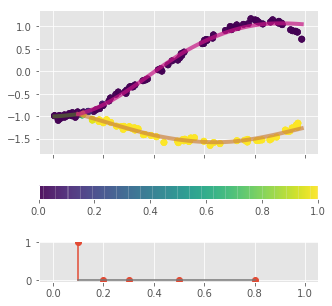

In [7]:
# plot fit for a gene
g = 0
GPy = Y.iloc[:, g][:, None]
GPt = data['Time'].values
globalBranching = data['MonocleState'].values.astype(int)
bmode = r['Bsearch'][np.argmax(r['gpmodels'][g]['loglik'])]
print('True branching time', trueBranchingTimes[g], 'BGP Maximum at b=%.2f' % bmode)
_=bplot.PlotBGPFit(GPy, GPt, r['Bsearch'], r['gpmodels'][g])


# Plot posterior
Plotting the posterior alongside the true branching location.

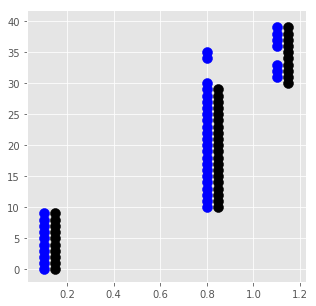

In [8]:
fs, ax = plt.subplots(1, 1, figsize=(5, 5))
for g in range(G):
    bmode = r['Bsearch'][np.argmax(r['gpmodels'][g]['loglik'])]
    ax.scatter(bmode, g, s=100, color='b')  # BGP mode
    ax.scatter(trueBranchingTimes[g]+0.05, g, s=100, color='k')  # True    